# 1. 데이터 읽기

In [15]:
from sklearn import datasets
import pandas as pd

boston_data, boston_target = datasets.fetch_openml('boston', version=1, return_X_y=True)

In [16]:
boston_data[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


> * CRIM: 지역별 범죄 발생률
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [17]:
df_boston = pd.DataFrame(boston_data)
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [18]:
df_boston['CHAS'] = df_boston['CHAS'].astype('int')

In [19]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    int64   
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(1), float64(11), int64(1)
memory usage: 48.4 KB


In [20]:
boston_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [21]:
df_boston['PRICE'] = boston_target.astype('int')
df_boston['RAD'] = df_boston['RAD'].astype('int')
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# 2. 각 feature별 주택 가격 영향도 조사

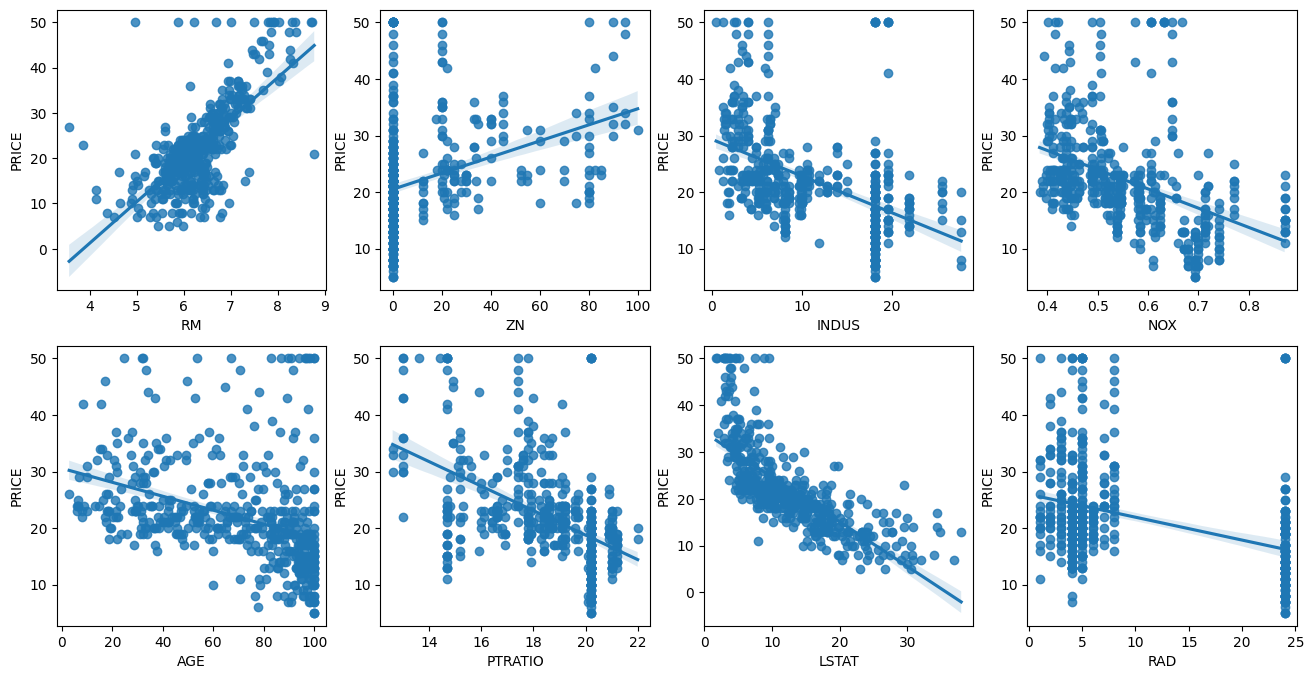

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = i // 4
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df_boston, ax=axs[row][col])

> 실행 결과 RM(방수), LSTAT(하위 계층 비율) 두 가지가 가격에 영향을 미치는 것으로 판단된다.

# 3. 모델 만들기

## 3.1 모델 만들기

In [23]:
df_labels = df_boston['PRICE']
df_data = df_boston.drop('PRICE', axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=10)

> 예측할 가격과 데이터를 구분한다.

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7018670256554724

> 예측 평점은 75점으로 낮게 나타났다.

# 4. 성능평가

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score: {r2_score(y_test, y_pred):.3f}')

MSE: 29.486, RMSE: 5.430
Variance score: 0.702


> 위와 같이 각 지표별 결과를 확인할 수 있다.

# 5. 교차검증

In [29]:
lr = LinearRegression()

> 데이터와 모델 생성

In [30]:
from sklearn.model_selection import cross_val_score, cross_validate

neg_mse_scores = cross_val_score(lr, df_data, df_labels, cv=5, scoring='neg_mean_squared_error')
rsme_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rsme_scores)

print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores, 2)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rsme_scores, 2)}')
print(f'5 folds의 평균 RMSE: {avg_rmse:.3f}')

5 folds의 개별 Negative MSE scores: [-12.84 -26.43 -33.28 -82.24 -33.4 ]
5 folds의 개별 RMSE scores: [3.58 5.14 5.77 9.07 5.78]
5 folds의 평균 RMSE: 5.868


> 예측 모델에서는 데이터가 크면 클 수록 좋다는 판단을 하게 된다. 하지만 회귀 모델에서는 실데이터와 예측데이터의 거리가 크면 그만큼 예측이 잘못된 것이 된다. 따라서 큰 수를 잘못된 예측으로 표현하기 위해 음수를 적용한 성능 평가를 해야 했고 이를 위해 neg_mean_squared_error를 성능 지표로 사용했다.